In this example, we will use a simple Dual Moving Average Crossover (DMAC, not to be confused with MACD) indicator as our entry and exit strategy. We will start with analyzing a single fast and slow window combination, and then move on to some advanced analysis such as building 2D heatmaps to compare multiple combinations and 3D cubes to see how they perform against time. Finally, we will explore how our DMAC strategy compares to holding Bitcoin and trading randomly.

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pytz
from dateutil.parser import parse
import ipywidgets as widgets
from copy import deepcopy
from tqdm import tqdm
import imageio
from IPython import display
import plotly.graph_objects as go
import itertools
import dateparser

In [3]:
# Enter your parameters here
seed = 42
symbol = 'BTC-USD'
metric = 'total_return'

start_date = datetime(2018, 1, 1, tzinfo=pytz.utc)  # time period for analysis, must be timezone-aware
end_date = datetime(2020, 1, 1, tzinfo=pytz.utc)
time_buffer = timedelta(days=100)  # buffer before to pre-calculate SMA/EMA, best to set to max window
freq = '1D'

vbt.settings.portfolio['init_cash'] = 100.  # 100$
vbt.settings.portfolio['fees'] = 0.0025  # 0.25%
vbt.settings.portfolio['slippage'] = 0.0025  # 0.25%

In [4]:
# Download data with time buffer
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
ohlcv_wbuf = vbt.YFData.download(symbol, start=start_date-time_buffer, end=end_date).get(cols)

ohlcv_wbuf = ohlcv_wbuf.astype(np.float64)
    
print(ohlcv_wbuf.shape)
print(ohlcv_wbuf.columns)

(831, 5)
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [5]:
# Create a copy of data without time buffer
wobuf_mask = (ohlcv_wbuf.index >= start_date) & (ohlcv_wbuf.index <= end_date) # mask without buffer

ohlcv = ohlcv_wbuf.loc[wobuf_mask, :]

print(ohlcv.shape)

(731, 5)


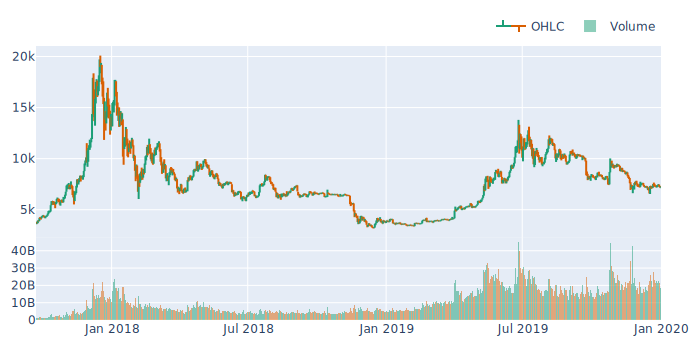

In [6]:
# Plot the OHLC data
ohlcv_wbuf.vbt.ohlcv.plot().show_svg() 
# remove show_svg() to display interactive chart!

### Single window combination
Perform a single test to see how our DMAC strategy compares to the hold strategy

In [7]:
fast_window = 30
slow_window = 80

In [ ]:
# Pre-calculate running windows on data with time buffer
fast_ma = vbt.MA.run(ohlcv_wbuf['Open'], fast_window)
slow_ma = vbt.MA.run(ohlcv_wbuf['Open'], slow_window)

print(fast_ma.ma.shape)
print(slow_ma.ma.shape)